# Unveiling the Secrets of Wine Quality

Bypassing traditional tasting methods, this project employs data analysis to predict the quality of wine based on its chemical features.

## 🍷 1. Introduction about the Data Set

### 📖 1.1 General Information:
- **Provided by**: [The UCI Machine Learning Repository](http://archive.ics.uci.edu/dataset/109/wine).
- **Donated by**: Paulo Cortez, Antonio Cerdeira, Fernando Almeida, Telmo Matos, and Jose Reis.
   - 📜 **Their paper**: [Modeling wine preferences by data mining from physicochemical properties](https://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf).
   - 🧐 **Main idea**: Using data mining to understand how various factors influence wine quality, offering insights into wine production and certification. 
   - ⚒️ **Approach**: Support Vector Machines (SVM), Neural Networks (NN), and Multiple Regression (MR) techniques.
   - 🧰 **Conclusion**: 
     - For assessing wine quality, the Support Vector Machine (SVM) method outperforms other techniques in accuracy, especially for white wines.
     - Alcohol level is a key factor in determining wine quality. Citric acid and residual sugar are more significant in white wines, whereas sulphates are highly important in both types.

### 🍇 1.2 Info about the Wine:
- **Types**: Both white and red wines from the Vinho Verde region in northwestern Portugal 🇵🇹.
- **Production**: Represents 15% of Portuguese production.

### 📊 1.3 Info about the Datasets:
- **Wines**: 1599 red and 4898 white samples.
- **Collection**:
   - ⏳ Timeframe: May 2004 to February 2007.
   - 🏷️ Type: Only protected designation of origin samples by CVRVV (Comissão de Viticultura da Região dos Vinhos Verdes), focused on enhancing the quality and marketing of vinho verde.
- **Quality Assessment**:
   - Rated by at least three sensory assessors (blind tastes), on a 0 (very bad) to 10 (excellent) scale. The final score is the median of these ratings.
- **Chemical Features Tested**:
   - 🧪 Data recorded by iLab, a computerized system managing wine sample testing.
   - Tests include density, alcohol, pH values, etc.
- **Limitation**:
  - Lack of Temporal Information:
    - We are unable to analyze variations in wine quality across different years, also making it impossible for us to identify the relationship between weather conditions and wine quality.
  - Lack of Brand and Public Preference Data: 
    - We are unable to establish a direct link between wine quality attributes and consumer preferences or sales performance. 

## 2. Research Questions and Motivations

### 2.1 Research Questions
Our reserach questions enhances and expands upon prior studies by:
  
- 🛠️ **Model Comparison Pipeline**: Developing a systematic pipeline to contrast various models. This includes tuning hyperparameters and evaluating performance scores.
- 🍇 **Quality Wine Recipes**: Crafting formulas for both **top-quality** and **poor-quality wines**. These models aim to avert the production of low-quality wines and spotlight the unique attributes of top-tier wines.
  - 🔍 **Deep Dive with PCA**: Investigating nuances in high-rated wines and applying Principal Component Analysis (PCA) for a more thorough exploration, surpassing traditional data mining approaches.
  - 🎯 **Focusing on Classification**: Utilizing advanced models like logistic regression and Random Forest for classifying wine quality tiers, assessing their accuracy, and pinpointing crucial quality influencers.



### 2.2 Motivations:
- 🇫🇷 **Cultural Significance**: Residing in France, a nation celebrated for its wine tradition, we seek to deepen our understanding of wine. This analysisfosters a greater appreciation of this heritage.
  
- 📊 **Analytical Depth:** Leveraging data-driven methods to explore wine quality nuances. This exploration will enhance our analytical skills while shedding light on hidden characteristics within wines.
- 🍾 **Enhancing Wine Production:** Providing actionable insights for quality improvement through advanced statistical and machine learning techniques.

## 3. Data Analysis

In [ ]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore

### 3.1 Extract Data: Reading from CSV Files

In [ ]:
# These csv files are downloaded from the UCI website.

df_white_wine = pd.read_csv("data/winequality-white.csv", sep=";")

df_red_wine = pd.read_csv("data/winequality-red.csv",sep=";")

df_red_wine
df_white_wine

In [ ]:
df_white_wine.head()

In [ ]:
df_red_wine.head()

In [ ]:
wine_lists = [df_red_wine, df_white_wine]

df_white_wine.wine_type = "White Wine"
df_red_wine.wine_type = "Red Wine"

def get_wine_str(wine_type_df):
    return getattr(wine_type_df, 'wine_type', "Unknown Wine")

### 3.2 Transformation

Here we want to create QQ Plots to understand if the features follow normal distribution or not.

In [ ]:
def check_numeric_columns(wine_type_df):
    return wine_type_df.select_dtypes(include=[np.number]).columns

In [ ]:
## Q-Q 
# boxplot - log scale 

def create_qq_plot(wine_type_df):
    wine_type = get_wine_str(wine_type_df)

    # Select only the numerical columns from the DataFrame
    numeric_columns = check_numeric_columns(wine_type_df)

    # Set up the matplotlib figure and axes for a 3x3 grid
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # Adjust the size as needed

    # Flatten the array of axes to make it easier to iterate over
    axs = axs.flatten()

    # Loop over the numerical columns and create a Q-Q plot for each
    for i, column in enumerate(numeric_columns):  
        data = wine_type_df[column]
        stats.probplot(data, dist="norm", plot=axs[i])
        axs[i].set_title(column, fontsize = 16)
        axs[i].set_xlabel('')
        axs[i].set_ylabel('')

    # Adjust layout to prevent overlap
    fig.suptitle(f"QQ Plots for {wine_type}", fontsize=20, weight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
def create_plots(plot_function, list = wine_lists):
    for i in list:
        plot_function(i)

In [ ]:
create_plots(create_qq_plot, wine_lists)

### Observations from QQ Plots of Red and White Wine Datasets:

1. **Right Skewness**:
   - **Red Wine**: `Residual Sugar` and `Alcohol` show deviations in the lower quantiles.
   - **White Wine**: Similar to Red Wine, `Residual Sugar` and `Alcohol` show deviations in the lower quantiles.

2. **Left Skewness**:
   - **Red Wine**: `Free Sulfur Dioxide`, `Chlorides`, and `Sulphates` show deviations in the upper quantiles.
   - **White Wine**: `Volatile Acidity`, `Chlorides`, and `Sulphates` show deviations in the upper quantiles.

3. **Implications for Data Processing**:
   - The observed skewness in both datasets suggests the need for normalization transformations. We will continue to calculate skewness coefficient. 
   - Techniques like logarithmic or Box-Cox transformations may be beneficial to address these deviations and improve the homogeneity of the data.

In [ ]:
def calculate_skewness_coefficient(wine_type_df):

    print(f"\nThe skewness coefficient of {get_wine_str(wine_type_df)}: \n")

    numerical_columns = wine_type_df.select_dtypes(include=['number']).columns

    for column in numerical_columns:  
        skewness = round(wine_type_df[column].skew(),2)
        print(f"{column}: {skewness}")

In [ ]:
create_plots(calculate_skewness_coefficient, wine_lists)

**Observations from the skewness coefficient**

1. **White Wine**:
   - Chlorides (5.02): Highly skewness. 
   - Volatile Acidity (1.58), Citric Acid (1.28), Residual Sugar (1.08), Free Sulfur Dioxide (1.41): : Moderate skewness.
2. **Red Wine**:
   - Residual Sugar (4.54) and Chlorides (5.68): Highly skewness
   - Free Sulfur Dioxide (1.25), Total Sulfur Dioxide (1.52), Sulphates (2.43): Moderate skewness.

We are going to do log transformation for features of highly skewness and moderate skewness.

In [ ]:
white_wine_log_columns = [
    'chlorides',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'free sulfur dioxide'
]

red_wine_log_columns = [
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'sulphates'
]

log_red_wine_df = df_red_wine.copy()
log_white_wine_df = df_white_wine.copy()

log_red_wine_df[red_wine_log_columns] = np.log(log_red_wine_df[red_wine_log_columns] + 0.001)
log_white_wine_df[white_wine_log_columns] = np.log(log_white_wine_df[white_wine_log_columns]+ 0.001)

log_red_wine_df.wine_type = "Red Wine(Log)"
log_white_wine_df.wine_type = "White Wine(Log)"

In [ ]:
log_dfs = [log_red_wine_df, log_white_wine_df]

create_plots(create_qq_plot, log_dfs)
create_plots(calculate_skewness_coefficient, log_dfs)

Observations based on the first log transformation:
1. **Red Wine (Original vs Log-Transformed):**
   - Original: `Residual sugar` 4.54, `Chlorides` 5.68.
   - Log-Transformed: `Residual sugar` 1.81, `Chlorides` 1.79.
   - `Free sulfur dioxide` changed from positive (1.25) to slightly negative skewness (-0.23).

2. **White Wine (Original vs Log-Transformed):**
   - Original: `Volatile acidity` 1.58, `Citric acid` 1.28.
   - Log-Transformed: `Volatile acidity` 0.14, `Citric acid` -5.56 (over-correction).
   - `Residual sugar` reduced from 1.08 to -0.16, `Chlorides` from 5.02 to 1.19.

3. **Minimal Impact on Some Variables:**
   - `Alcohol` and `quality` in both Red and White wines showed minimal changes (around 0.86 and 0.22 respectively).

4. **Avoid Log Transformation For:**
   - Red Wine: `Free sulfur dioxide` and `Total sulfur dioxide`.
   - White Wine: `Citric acid` and `Residual sugar` .

In [ ]:
white_wine_update_log_columns = [
    'chlorides',
    'volatile acidity'
]
red_wine_update_log_columns = [
    'residual sugar',
    'chlorides'
]

log_red_update_wine_df = df_red_wine.copy()
log_white_update_wine_df = df_white_wine.copy()

log_red_update_wine_df[red_wine_update_log_columns] = np.log(log_red_update_wine_df[red_wine_update_log_columns] + 0.001)
log_white_update_wine_df[white_wine_update_log_columns] = np.log(log_white_update_wine_df[white_wine_update_log_columns]+ 0.001)

log_red_update_wine_df.wine_type = "Red Wine(Second Log)"
log_white_update_wine_df.wine_type = "White Wine(Second Log)"

log_update_dfs = [log_white_update_wine_df, log_red_update_wine_df]

create_plots(create_qq_plot, log_update_dfs)
create_plots(calculate_skewness_coefficient, log_update_dfs)

Observations:

1. **White Wine:**
   - Log transformation significantly reduced skewness in `volatile acidity` (from 1.58 to 0.14) and `chlorides` (from 5.02 to 1.19).
2. **Red Wine:**
   - Effective reduction in skewness for `residual sugar` (from 4.54 to 1.81) and `chlorides` (from 5.68 to 1.79).
3. **Conclusion:**
   - The second log transformation was successful in reducing high skewness for key variables in both Red and White Wine datasets.


### 3.3 Clean Data

#### 3.3.1 Check for missing values

We are going to check if there are empty values.

In [ ]:
def check_na(wine_type_df):
    print(f'{get_wine_str(wine_type_df)}')
    print(wine_type_df.info())
    print(wine_type_df.isnull().sum())

create_plots(check_na, log_update_dfs)

**Observations from Checking Missing Values:**
1. There are no missing data in either dataset.
2. All feature columns are of the float type, and the target column is an integer.

#### 3.3.2 Outlier Analysis

We will create box plots to understand the outliers.

In [ ]:
def create_box_plot(wine_type_df):
    feature_columns = wine_type_df.drop(columns=['quality']).columns.tolist()
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  

    # Flatten the array of axes to make it easier to iterate over
    axs = axs.flatten()

    for i, column in enumerate(feature_columns): 
        sns.boxplot(x='quality', y=column, data=wine_type_df, ax=axs[i], legend=False, color = "grey")
        plt.xticks(fontsize=14) 
        plt.yticks(fontsize=14)

    fig.suptitle(f'Box Plots for {get_wine_str(wine_type_df)}', fontsize=20, weight='bold')
    plt.show()

In [ ]:
create_plots(create_box_plot, log_update_dfs)

**Observations from Box Plots**
1. It's hard to decide should we delete outliers or not based on these plots. 
2. We are going to develop separate QQ plots for wines classified into different quality categories: bad(3-4), middle(5-6-7), and good(8-9) to better understand our outliers.

In [ ]:
bin_edges = [2, 5, 10]
bin_labels = ['poor', 'good']

red_wine_quality_df = log_red_update_wine_df.copy()
white_wine_quality_df = log_white_update_wine_df.copy()

red_wine_quality_df['quality_category'] = pd.cut(red_wine_quality_df['quality'], bins=bin_edges, labels=bin_labels)
white_wine_quality_df['quality_category'] = pd.cut(white_wine_quality_df['quality'], bins=bin_edges, labels=bin_labels)


In [ ]:
df_red_poor = red_wine_quality_df[red_wine_quality_df['quality_category'] == 'poor']
df_red_good = red_wine_quality_df[red_wine_quality_df['quality_category'] == 'good']

df_white_poor = white_wine_quality_df[white_wine_quality_df['quality_category'] == 'poor']
df_white_good = white_wine_quality_df[white_wine_quality_df['quality_category'] == 'good']


wine_quality_dfs = [
    df_white_poor,
    df_white_good,
    df_red_poor,
    df_red_good
]


In [ ]:
df_white_poor.wine_type = 'White Wine Poor'
df_white_good.wine_type = 'White Wine Good'
df_red_poor.wine_type = 'Red Wine Poor'
df_red_good.wine_type = 'Red Wine Good'

In [ ]:
create_plots(create_qq_plot, wine_quality_dfs)

To understand distribution asymmetries, we use skewness coefficient to identify which variables deviate from normality.

In [ ]:
create_plots(calculate_skewness_coefficient, wine_quality_dfs)

To pinpoint extreme outliers, we use a a threshold of Z-score > 6 to focuse on the most anomalous data points in the wine quality dataset.

In [ ]:
def calculate_z_score(wine_type_df):
    z_scores_df = wine_type_df.copy()

    print(f"\nZ Score of {get_wine_str(wine_type_df)}:\n")

    for col in wine_type_df.columns:
        if col != 'quality' and col != 'quality_category':
            z_scores_df[col + ' Z-score'] = zscore(wine_type_df[col])
            
            outliers = abs(z_scores_df[col + ' Z-score']) > 6
            outlier_count = outliers.sum()
            print(f"Outliers in {col}: {outlier_count}")

            if outlier_count > 0:
                print(f"Outlier data for {col}:\n{wine_type_df[outliers]}")
                print("\n") 

In [ ]:
create_plots(calculate_z_score, wine_quality_dfs)

**Observations from Skewness Coefficients and Z-Score Analysis**

### White Wine:
- **Poor Quality White Wine:**
  - Notable skewness in `chlorides` (1.51) and `free sulfur dioxide` (1.85).
  - Outliers are mainly in `free sulfur dioxide` and `total sulfur dioxide`.
- **Good Quality White Wine:**
  - Higher skewness in `citric acid` (1.94) and `density` (1.53).
  - Outliers are present in several attributes, notably in `citric acid` (7 outliers) and `density` (1 outlier).

### Red Wine:
- **Poor Quality Red Wine:**
  - Considerable skewness in `chlorides` (2.51) and `sulphates` (3.08).
  - Outliers are observed in `sulphates` (2) and `alcohol` (1).
- **Good Quality Red Wine:**
  - Skewness is pronounced in `total sulfur dioxide` (2.64) and `sulphates` (2.18).
  - Outliers are mainly in `total sulfur dioxide` (2) and `sulphates` (2).

In [ ]:
def delete_outliers(wine_type_df):
    without_outliers_df = wine_type_df.copy()

    for col in without_outliers_df.columns:
        if col != 'quality' and col != 'quality_category':
            without_outliers_df[col + '_Z_score'] = zscore(without_outliers_df[col])

    for col in without_outliers_df.columns:
        if '_Z_score' in col:
            without_outliers_df = without_outliers_df[np.abs(without_outliers_df[col]) <= 6]

    return without_outliers_df.drop(columns=[c for c in without_outliers_df if '_Z_score' in c])

In [ ]:
df_white_poor_without_outliers = delete_outliers(df_white_poor)
df_white_good_without_outliers = delete_outliers(df_white_good)
df_red_poor_without_outliers = delete_outliers(df_red_poor)
df_red_good_without_outliers = delete_outliers(df_red_good)

df_white_poor_without_outliers.wine_type = 'White Wine Poor (Without Outliers)'
df_white_good_without_outliers.wine_type = 'White Wine Good (Without Outliers)'
df_red_poor_without_outliers.wine_type = 'Red Wine Poor (Without Outliers)'
df_red_good_without_outliers.wine_type = 'Red Wine Good (Without Outliers)'


In [ ]:
wine_quality_without_outliers_dfs = [
    df_white_poor_without_outliers,
    df_white_good_without_outliers,
    df_red_poor_without_outliers,
    df_red_good_without_outliers
]


In [ ]:
create_plots(create_box_plot, wine_quality_without_outliers_dfs)

Create heatmaps to understant the relationship between features and wine quality score.

In [ ]:
def create_corr_matrix(wine_type_df):
       numeric_columns = check_numeric_columns(wine_type_df)

       #print(f'Correlation matrix for {get_wine_str(wine_type_df)}')
       #print(wine_type_df[numeric_columns].corr())
       return wine_type_df[numeric_columns].corr()


def create_clustermap(wine_type_df):
       correlation_matrix = create_corr_matrix(wine_type_df)

       cmap = sns.diverging_palette(230, 20, as_cmap=True)
       clustermap_fig = sns.clustermap(correlation_matrix, annot=True, cmap= cmap,linewidths=.5, vmax=1, vmin=-1)

       plt.subplots_adjust(top=0.9)
       clustermap_fig.fig.suptitle(f'Correlation matrix for {get_wine_str(wine_type_df)}', fontsize=20, weight='bold')

       plt.show()


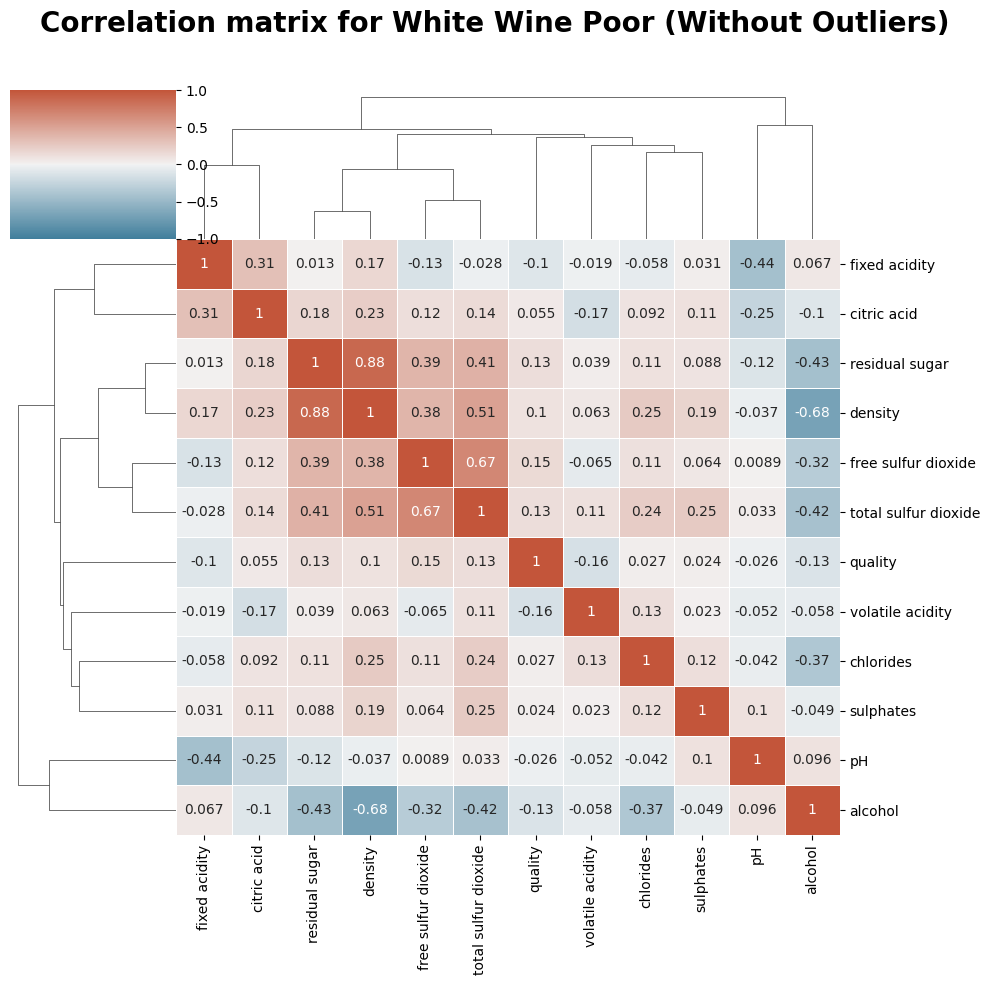

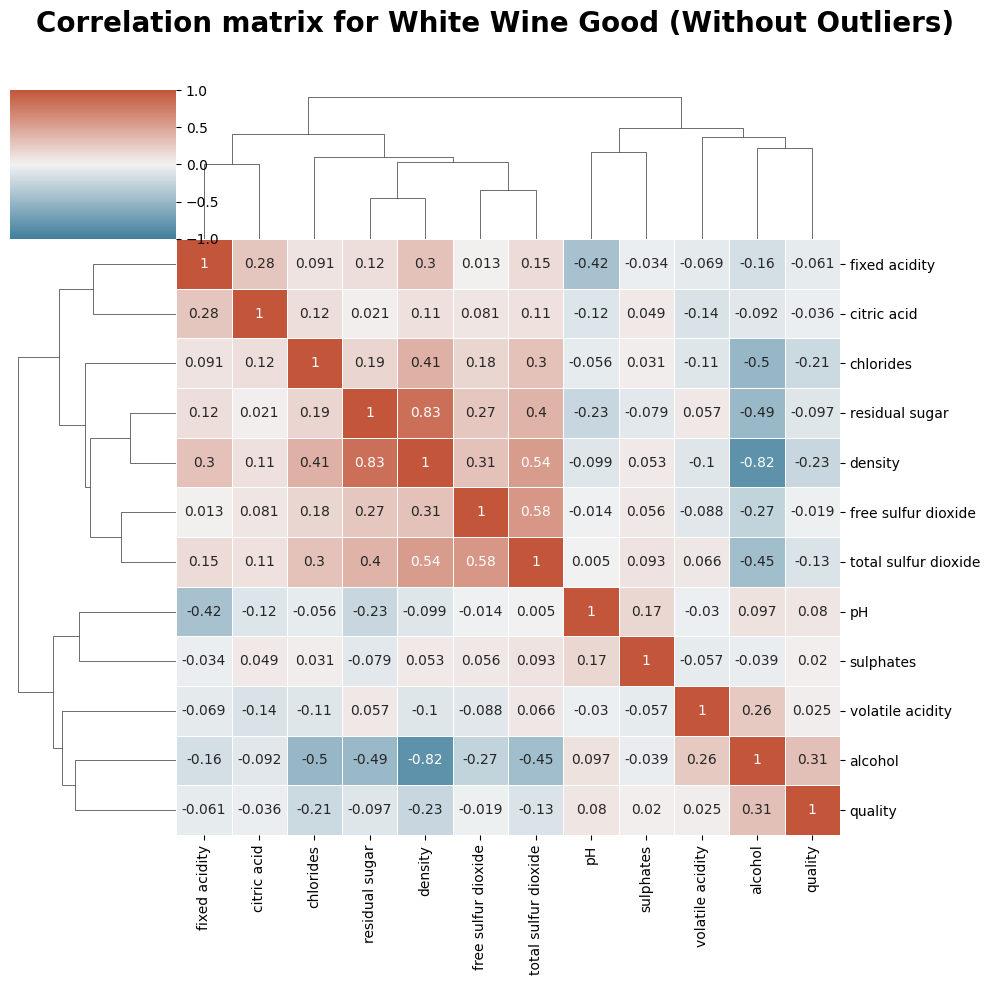

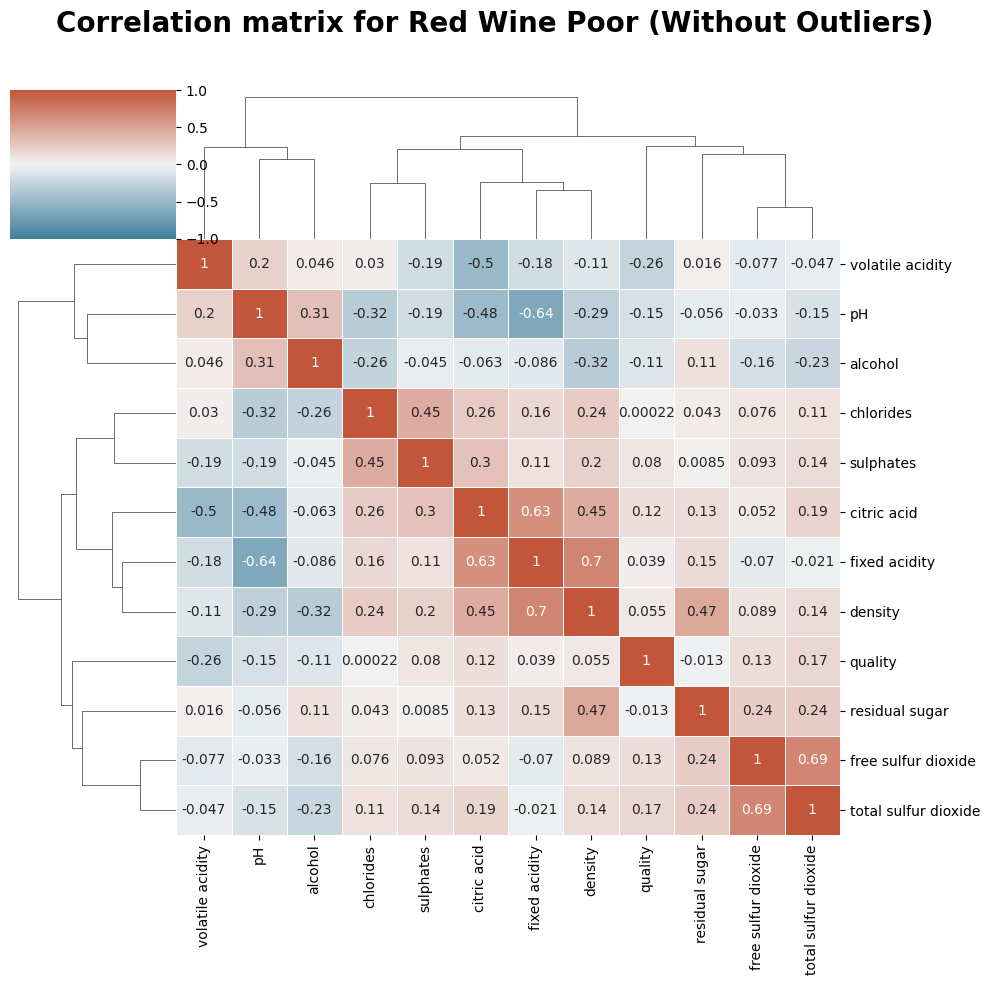

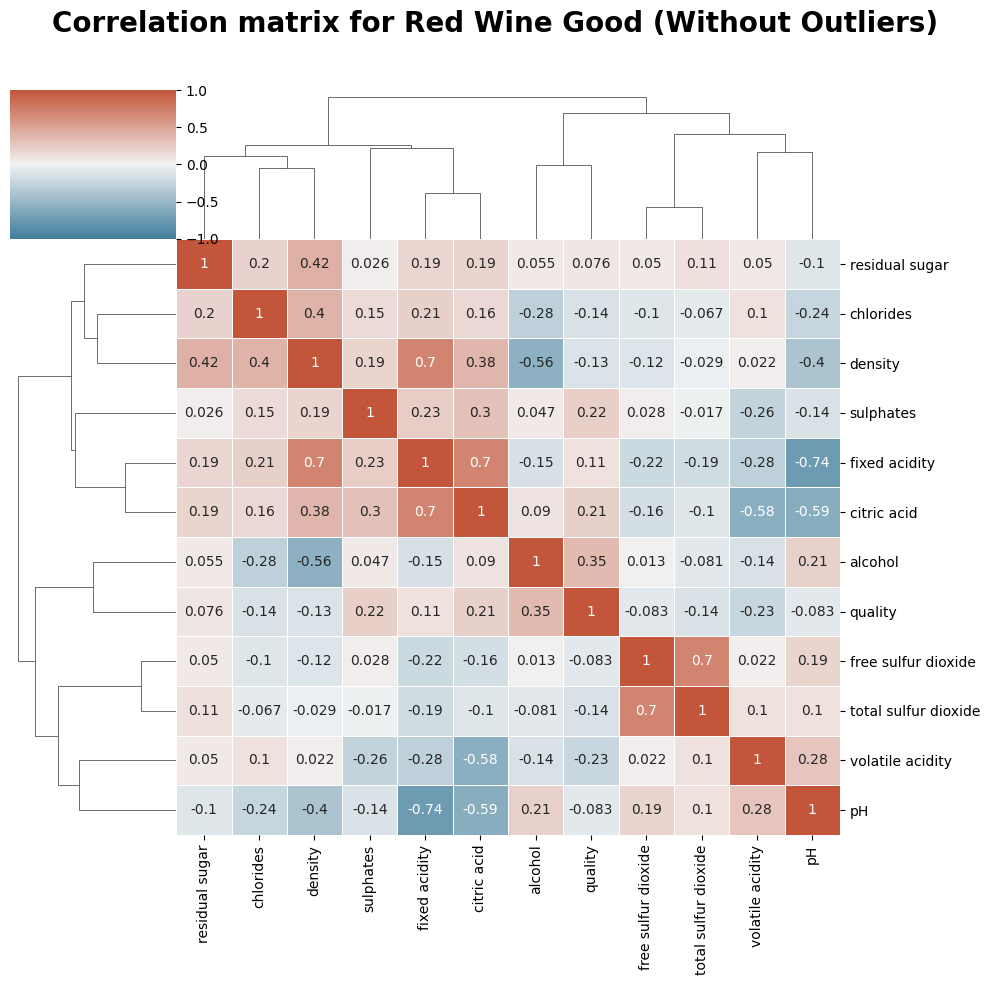

In [176]:
create_plots(create_clustermap, wine_quality_without_outliers_dfs)

In [181]:
def create_corr_with_target(wine_type_df, target = 'quality'):
    correlation_matrix = create_corr_matrix(wine_type_df)
    correlation_with_target = correlation_matrix[target].sort_values(key=abs, ascending=False)

    return correlation_with_target


def return_top_features_with_target(wine_type_df, n = 8):
    '''
    A function that return top features that are related to the target column.
    '''
    correlation_with_target = create_corr_with_target(wine_type_df)

    top_features = correlation_with_target[1:n+1].index.tolist() 
    return top_features

In [179]:
def return_top_features_with_target
threshold = 0.5

correlation_matrix = create_corr_matrix(df_white_good_without_outliers)

correlation_with_target = correlation_matrix['quality'].sort_values(key=abs, ascending=False)

selected_features = [correlation_with_target.index[1]]  

for feature in correlation_with_target.index[2:]:
    if all(abs(correlation_matrix[feature][selected_feature]) < threshold for selected_feature in selected_features):
        selected_features.append(feature)
        if len(selected_features) == n: 
            break

selected_features


['alcohol',
 'density',
 'chlorides',
 'total sulfur dioxide',
 'residual sugar',
 'pH',
 'fixed acidity',
 'citric acid']

['alcohol',
 'total sulfur dioxide',
 'residual sugar',
 'pH',
 'fixed acidity',
 'citric acid',
 'volatile acidity',
 'sulphates']

**Conclusions from the clustermaps**

- Features that have high correlation between each other but low correlation with *quality* can be used to reduced dementions of our data  (We can use PCA to identyfe as many features we need)

### Selecting the most importnat features for **quality** prediction using top K features 

## Visualize Data

1) Quality distribiution based on the wine type (color)

In [ ]:
def visualize_quality_histogram(datasets):
    num_datasets = len(datasets)

    # Create subplots
    fig, axes = plt.subplots(1, num_datasets, figsize=(15, 5), sharey=True)

    for i, (df, name) in enumerate(datasets):
        quality_column = df['quality']
        axes[i].hist(quality_column, bins=20, edgecolor='black', density = True)
        axes[i].set_xlabel('Quality Score')
        axes[i].set_ylabel('Density')
        axes[i].set_title(f'{name} Quality Score Distribution')

    plt.tight_layout()
    plt.show()

# Example usage with two datasets (red wine and white wine)
datasets = [
    (df_red_wine, 'Red Wine'),
    (df_white_wine, 'White Wine')
]

visualize_quality_histogram(datasets)


## Significant Statement

## Conclusion & Discussions